In [1]:
import pandas as pd
import sklearn
import statsmodels
import scipy

print('pandas: ',pd.__version__)
print('sklearn: ',sklearn.__version__)
print('statsmodels: ',statsmodels.__version__)
print('scipy: ',scipy.__version__)


pandas:  0.24.2
sklearn:  0.21.2
statsmodels:  0.10.0
scipy:  1.3.0


In [2]:
%load_ext autoreload



In [3]:
%autoreload 2

In [4]:
from capstone_data_eng import *
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
from plotting_functions import *


from scipy.stats import randint as sp_randint , uniform

from matplotlib.colors import BoundaryNorm, LogNorm
from statsmodels.stats.proportion import proportion_confint

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc , confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, fbeta_score, make_scorer, auc

from inspect import signature

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.manifold import TSNE

import pickle


from lightfm import LightFM
from scipy.sparse import coo_matrix,csr_matrix 

In [6]:
out, profile_all, portfolio, offers_all, transactions_all, transactions_during_offer, transactions_outside_offer = load_data_cv(
        person_split=None, rename_offers=True, time_split_min=None, time_split_max=None,
        add_transactions=False, skip_overlap=True, skip_add_purchases=False, calc_net_offer_time=True,
        assign_to='ignore', location='local')

/home/marco/UD/Starbucks_capstone/capstone_data_eng.py:795: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  profile_all = load_profile(location=location)


offer received     76277
offer viewed       57725
offer completed    33579
Name: event, dtype: int64
er,ec,ev
(76277, 3) (33579, 4) (57725, 3)
er  (76277, 6)
persons with no offers received in timeframe:  6
transactions_during_offer.shape: (104635, 7)
skip_overlap: True
Index(['person', 'time', 'payments', 'tr_id', 'offer', 'idx', 'offer_viewed'], dtype='object')
Index(['person', 'time', 'payments', 'tr_id', 'offer', 'idx', 'offer_viewed',
       'overlaps'],
      dtype='object')
(76277, 27)
add_stats_by_person:
(76277, 38)
(76277, 44)
(76277, 50)
(76277, 51)
(76277, 60)


In [ ]:
# without assigning overlapping offers
out, profile_all, portfolio, offers_all, transactions_all, transactions_during_offer, transactions_outside_offer = load_data_cv(
        person_split=None, rename_offers=True, time_split_min=None, time_split_max=None,
        add_transactions=False, skip_overlap=False, skip_add_purchases=False, calc_net_offer_time=True,
        assign_to='ignore', location='local')

In [9]:
portfolio,offers_all,profile_all ,transactions_all= basic_load_data_cv(  rename_offers=True, location='local')

/home/marco/UD/Starbucks_capstone/capstone_data_eng.py:744: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  profile_all = load_profile(location=location)


 combined, transactions_during_offer, transactions_outside_offer, trans = create_pivot_table(portfolio, profile_all,offers_all,
        transactions_all,add_transactions=False, skip_overlap=False, skip_add_purchases=False, calc_net_offer_time=False, assign_to='first') 


In [17]:
combined = create_person_offer_table(offers_all, transactions_all, portfolio)
combined = add_offers_df(combined, portfolio);

offer received     76277
offer viewed       57725
offer completed    33579
Name: event, dtype: int64
er,ec,ev
(76277, 3) (33579, 4) (57725, 3)
er  (76277, 6)
persons with no offers received in timeframe:  6


In [11]:
combined.head()

,person,offer,offer_received,offer_viewed,offer_completed,reward,offer_end,difficulty,duration,offer_type,...,social,offer_reward,duration_hours,duration_viewed,duration_effective,viewed,rewarded,received,comp_not_viewed,completed
0,78afa995795e4d85b5d9ceeca43f5fef,g,0,6.0,132.0,5.0,168.0,5,7,bogo,...,False,5,168.0,162.0,162.0,True,True,True,False,True
1,ebe7ef46ea6f4963a7dd49f501b26779,g,0,NaN,NaN,NaN,168.0,5,7,bogo,...,False,5,168.0,0.0,0.0,False,False,True,False,False
2,f082d80f0aac47a99173ba8ef8fc1909,g,0,48.0,12.0,5.0,168.0,5,7,bogo,...,False,5,168.0,120.0,120.0,True,True,True,True,False
3,c0d210398dee4a0895b24444a5fcd1d2,g,0,30.0,66.0,5.0,168.0,5,7,bogo,...,False,5,168.0,138.0,138.0,True,True,True,False,True
4,57dd18ec5ddc46828afb81ec5977bef2,g,0,NaN,NaN,NaN,168.0,5,7,bogo,...,False,5,168.0,0.0,0.0,False,False,True,False,False


In [15]:
pd.options.display.max_columns = None

In [18]:
person='041967ceb80841ddbd306958d4f744ac'
# combined=out
combined.loc[combined.person==person]

,person,offer,offer_received,offer_viewed,offer_completed,reward,offer_end,difficulty,duration,offer_type,web,email,mobile,social,offer_reward,duration_hours,duration_viewed,duration_effective,viewed,rewarded,received,comp_not_viewed,completed
12016,041967ceb80841ddbd306958d4f744ac,a,408,492.0,576.0,5.0,648.0,20,10,discount,True,True,False,False,5,240.0,156.0,156.0,True,True,True,False,True
13271,041967ceb80841ddbd306958d4f744ac,a,504,534.0,576.0,5.0,744.0,20,10,discount,True,True,False,False,5,240.0,210.0,210.0,True,True,True,False,True
38630,041967ceb80841ddbd306958d4f744ac,i,0,6.0,108.0,5.0,120.0,5,5,bogo,True,True,True,True,5,120.0,114.0,114.0,True,True,True,False,True
75472,041967ceb80841ddbd306958d4f744ac,f,576,576.0,NaN,NaN,648.0,0,3,informational,False,True,True,True,0,72.0,72.0,72.0,True,False,True,False,False


In [14]:
transactions_all.loc[transactions_all.person==person]

,event,person,time,value,transaction,offer,reward
43652,transaction,041967ceb80841ddbd306958d4f744ac,108,{'amount': 35.47},35.47,NaN,NaN
101895,transaction,041967ceb80841ddbd306958d4f744ac,282,{'amount': 14.88},14.88,NaN,NaN
215853,transaction,041967ceb80841ddbd306958d4f744ac,504,{'amount': 13.95},13.95,NaN,NaN
259546,transaction,041967ceb80841ddbd306958d4f744ac,576,{'amount': 26.8},26.80,NaN,NaN
275518,transaction,041967ceb80841ddbd306958d4f744ac,606,{'amount': 23.22},23.22,NaN,NaN
288527,transaction,041967ceb80841ddbd306958d4f744ac,642,{'amount': 25.09},25.09,NaN,NaN


In [24]:
transactions_during_offer.loc[ transactions_during_offer.person==person]

,person,time,payments,tr_id,offer,idx,offer_viewed,overlaps
12875,041967ceb80841ddbd306958d4f744ac,504,13.95,215853,a,2153,492.0,0
12876,041967ceb80841ddbd306958d4f744ac,576,26.80,259546,a,2154,492.0,1
122000,041967ceb80841ddbd306958d4f744ac,576,26.80,259546,f,2154,576.0,1
12877,041967ceb80841ddbd306958d4f744ac,606,23.22,275518,a,2155,492.0,1
122001,041967ceb80841ddbd306958d4f744ac,606,23.22,275518,f,2155,576.0,1
12878,041967ceb80841ddbd306958d4f744ac,642,25.09,288527,a,2156,492.0,1
122002,041967ceb80841ddbd306958d4f744ac,642,25.09,288527,f,2156,576.0,1
64126,041967ceb80841ddbd306958d4f744ac,108,35.47,43652,i,2151,6.0,0


In [23]:
combined, trans, transactions_during_offer, transactions_outside_offer = extract_transactions(combined, 
    transactions_all,add_transactions=False,skip_overlap=False);

transactions_during_offer.shape: (122652, 7)
skip_overlap: False
Index(['person', 'time', 'payments', 'tr_id', 'offer', 'idx', 'offer_viewed'], dtype='object')
Index(['person', 'time', 'payments', 'tr_id', 'offer', 'idx', 'offer_viewed',
       'overlaps'],
      dtype='object')


In [51]:
combined.loc[combined.person==person].iloc[1]

person                041967ceb80841ddbd306958d4f744ac
offer                                                a
offer_received                                     504
offer_viewed                                       534
offer_completed                                    576
reward                                               5
offer_end                                          744
difficulty                                          20
duration                                            10
offer_type                                    discount
web                                               True
email                                             True
mobile                                           False
social                                           False
offer_reward                                         5
duration_hours                                     240
duration_viewed                                    210
duration_effective                                 210
viewed    

In [52]:
combined = add_purchases(combined, profile_all, transactions_outside_offer, transactions_during_offer,
                                 calc_net_offer_time=True, assign_to='first', skip_overlap=True)

(76277, 27)
add_stats_by_person:
(76277, 38)
(76277, 44)
(76277, 50)
(76277, 51)
(76277, 60)


In [42]:
t_spec_offer = transactions_during_offer.groupby(by=['person', 'offer', 'offer_viewed'])['payments'].agg(
        ['sum', 'count', 'max', 'min'])
t_spec_offer.rename(
        columns={'sum': 'Tpay_offer', 'count': 'Npay_offer', 'max': 'Maxpay_offer', 'min': 'Minpay_offer', },
        inplace=True)

In [43]:
t_spec_offer.head()

Tpay_offer  Npay_offer  \
person                           offer offer_viewed                           
0009655768c64bdeb2e877511632db8f d     372.0               8.57           1   
                                 f     192.0              22.16           1   
                                 i     456.0              14.11           1   
                                 j     540.0              82.76           5   
0011e0d4e6b944f998e987f904e8c1e5 a     432.0              45.08           2   

                                                     Maxpay_offer  \
person                           offer offer_viewed                 
0009655768c64bdeb2e877511632db8f d     372.0                 8.57   
                                 f     192.0                22.16   
                                 i     456.0                14.11   
                                 j     540.0                28.16   
0011e0d4e6b944f998e987f904e8c1e5 a     432.0                23.03   

                                                     Minpay_offer  
person                           offer offer_viewed                
0009655768c64bdeb2e877511632db8f d     372.0                 8.57  
                                 f     192.0                22.16  
                                 i     456.0                14.11  
                                 j     540.0                10.27  
0011e0d4e6b944f998e987f904e8c1e5 a     432.0                22.05

In [44]:
combined_with_purchases = combined.merge(t_spec_offer, on=['person', 'offer', 'offer_viewed'], how='left')

In [45]:
combined_with_purchases.head()

,person,offer,offer_received,offer_viewed,offer_completed,reward,offer_end,difficulty,duration,offer_type,...,Net_pay_offers,Avg_net_pay_offers,Avg_pay_outside,Avg_D_O,Avg_D_OS,Avg_D_nOS,Tpay_offer_y,Npay_offer_y,Maxpay_offer_y,Minpay_offer_y
0,78afa995795e4d85b5d9ceeca43f5fef,g,0,6.0,132.0,5.0,168.0,5,7,bogo,...,115.34,0.288350,0.000000,0.232531,0.338350,0.288350,37.67,2.0,19.89,17.78
1,ebe7ef46ea6f4963a7dd49f501b26779,g,0,NaN,NaN,0.0,168.0,5,7,bogo,...,45.17,0.152088,0.116510,-0.116510,0.049045,0.035577,NaN,NaN,NaN,NaN
2,f082d80f0aac47a99173ba8ef8fc1909,g,0,48.0,12.0,5.0,168.0,5,7,bogo,...,19.86,0.060734,0.098177,0.023823,-0.022153,-0.037444,14.64,4.0,11.13,0.28
3,c0d210398dee4a0895b24444a5fcd1d2,g,0,30.0,66.0,5.0,168.0,5,7,bogo,...,36.05,0.074793,0.233779,-0.190228,-0.121642,-0.158986,6.01,1.0,6.01,6.01
4,57dd18ec5ddc46828afb81ec5977bef2,g,0,NaN,NaN,0.0,168.0,5,7,bogo,...,202.54,0.531601,0.000000,0.000000,0.576220,0.531601,NaN,NaN,NaN,NaN


,person,offer,offer_received,offer_viewed,offer_completed,reward,offer_end,difficulty,duration,offer_type,...,tot_gross_offer_time,tot_net_offers_time,tot_not_offers_time,Avg_pay_offers,Net_pay_offers,Avg_net_pay_offers,Avg_pay_outside,Avg_D_O,Avg_D_OS,Avg_D_nOS
0,78afa995795e4d85b5d9ceeca43f5fef,g,0,6.0,132.0,5.0,168.0,5,7,bogo,...,396.0,400.0,344.0,0.338350,115.34,0.288350,0.000000,0.232531,0.338350,0.288350
1,ebe7ef46ea6f4963a7dd49f501b26779,g,0,NaN,NaN,0.0,168.0,5,7,bogo,...,390.0,297.0,447.0,0.165556,45.17,0.152088,0.116510,-0.116510,0.049045,0.035577
2,f082d80f0aac47a99173ba8ef8fc1909,g,0,48.0,12.0,5.0,168.0,5,7,bogo,...,402.0,327.0,417.0,0.076024,19.86,0.060734,0.098177,0.023823,-0.022153,-0.037444
3,c0d210398dee4a0895b24444a5fcd1d2,g,0,30.0,66.0,5.0,168.0,5,7,bogo,...,570.0,482.0,262.0,0.112137,36.05,0.074793,0.233779,-0.190228,-0.121642,-0.158986
4,57dd18ec5ddc46828afb81ec5977bef2,g,0,NaN,NaN,0.0,168.0,5,7,bogo,...,492.0,381.0,363.0,0.576220,202.54,0.531601,0.000000,0.000000,0.576220,0.531601
5,a3b9b4bf115e4564933ea2e4bc936843,g,0,18.0,NaN,0.0,168.0,5,7,bogo,...,300.0,302.0,442.0,0.480795,133.20,0.441060,0.000000,0.055600,0.480795,0.441060
6,32fbf97e89274e8a935903f2ad095e1f,g,0,96.0,156.0,5.0,168.0,5,7,bogo,...,474.0,429.0,315.0,0.178438,56.55,0.131818,0.000000,0.119028,0.178438,0.131818
7,52f0bd64403f4958ab8fe9a6947c13c3,g,0,NaN,NaN,0.0,168.0,5,7,bogo,...,354.0,356.0,388.0,0.411067,117.34,0.329607,0.000000,0.000000,0.411067,0.329607
8,d41fa9b8c2e24a1d94caa890c53bbcf6,g,0,NaN,NaN,0.0,168.0,5,7,bogo,...,102.0,103.0,641.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,c099206f76b1414db7552f163520053c,g,0,0.0,NaN,0.0,168.0,5,7,bogo,...,612.0,573.0,171.0,0.039145,22.43,0.039145,0.134035,-0.127249,-0.094890,-0.094890


In [25]:
def fit_col_transformer(X_train,categorical_features,numeric_features):
    ohe= OneHotEncoder(handle_unknown='ignore')
    ssc=StandardScaler()

    ohe.fit(X_train[categorical_features])
    ssc.fit(X_train[numeric_features])
    return(ohe,ssc)
    
def apply_transformer(ohe,ssc,X,categorical_features,numeric_features,binary_features):
    xoh=ohe.transform(X[categorical_features]).todense()
    dfoh=pd.DataFrame(data=xoh,columns=ohe.get_feature_names(input_features=categorical_features))
    
    xn=ssc.transform(X[numeric_features])
    dfxn=pd.DataFrame(data=xn,columns=numeric_features)
    
    if len(binary_features)>0:
        dfxb=X[binary_features].astype(int)
        out=pd.concat( (dfoh,dfxn,dfxb),axis=1 )
    
    out=pd.concat( (dfoh,dfxn),axis=1 )
    
    return(out)
        

In [26]:
def plot_roc(y_prob,y_test,y_label,  first_plot=True):
    # compare ROC 

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    if first_plot:
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
                 label='Chance', alpha=.8)
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC')
        plt.legend(loc="lower right");
        plt.axis('square');

    plt.plot(fpr, tpr, lw=1, alpha=1, label='ROC %s(AUC = %0.2f)' % (y_label,roc_auc));
    plt.legend(loc="lower right");
        

## Imputation of missing values

We use the mean values extracted in the EDA part to impute missing values.
We also create the features discussed in the EDA part.

In [27]:
out.income=out.income.fillna(65400)
out.age=out.age.fillna(54)
out.gender=out.gender.fillna('M')
out['group118']=out['age']>116
out.loc[out['age']>116,'age']=54

out['binned_income'] = pd.cut(out['income'],bins= np.arange(0,14)*1e4,labels=np.arange(0,13)*10)
out['binned_age'] = pd.cut(out['age'],bins= np.arange(0,120,10) ,labels=np.arange(0,120,10)[:-1])

We separate the columns depending on their content and type.

In [28]:
c_bin_offer=['web','email', 'mobile', 'social','viewed', 'rewarded', 'received', 'comp_not_viewed', 'completed']

c_num_time=['offer_received', 'offer_viewed', 'offer_completed', 'offer_end',]
c_num_offer=['overlaps','offer_reward', 'difficulty', 'duration'  ]
c_num_leak_offer=['Tpay_offer', 'Npay_offer', 'Maxpay_offer', 'Minpay_offer', 'Netpay_offer', 'Avg_pay_offer', 
                  'Avg_pay_outside', 'Avg_D_O','reward', 'duration_viewed','duration_effective', ]
c_num_person=['age', 'income', 'Tpay_out', 'Npay_out', 'user_time' ,'binned_age','binned_income']
c_num_person_ignore=['became_member_on',   'joined_year', 'joined_month','joined_week', 'gender_num',  'duration_hours',]

c_cat_offer=[ 'offer_type' ]

c_bin_person=['group118']
c_cat_person=['gender',]
c_drop_order=['person','offer']

c_num_offers=['p_c_r_ratio','p_c_v_ratio', 'p_cnv_r_ratio','Tpay_offers_tot',
       'Npay_offers_tot', 'Maxpay_offers_tot', 'Minpay_offers_tot',
       'Trewards_tot', 'Nrewards_tot', 'tot_gross_offer_time',
       'tot_net_offers_time', 'tot_not_offers_time', 'Avg_pay_offers',
       'Net_pay_offers', 'Avg_net_pay_offers', 
       'Avg_D_OS','Avg_D_nOS']


In [29]:
c_total=c_bin_offer+c_bin_person+c_num_time+c_num_offer+c_num_leak_offer+c_num_person+c_num_person_ignore + \
    c_cat_offer+c_cat_person+c_num_offers+ c_drop_order

In [30]:
display(set(c_total) ^ set(out.columns))

set()

In [31]:
print("columns with nan:")
fna=list(out.columns[out.isna().any()])
print(fna)

columns with nan:
['offer_viewed', 'offer_completed']


# Classification of Completed not viewed offers

In [15]:
outd=out.copy()
outd=outd.drop(columns=c_num_leak_offer+c_num_offers+c_num_person_ignore+[ 'offer_viewed', 'offer_completed', 'offer_end'])
outd=outd.drop(columns=['viewed', 'rewarded', 'received', 'comp_not_viewed', 'completed','overlaps'])
outd=outd.drop(columns=['person','email'])
outd=outd.drop(columns=['age','income'])

Y=out['comp_not_viewed']

In [16]:
X_train, X_test, y_train, y_test = train_test_split( outd, Y, test_size=0.3, random_state=0)

In [17]:
numeric_features = ['Tpay_out', 'Npay_out']
binary_features=[       'web', 'mobile', 'social','group118']

categorical_features = ['offer', 'offer_received', 'gender', 'difficulty', 'duration', 'offer_type',
       'offer_reward', 'gender' , 'binned_income', 'binned_age']
    

In [18]:
ohe,ssc=fit_col_transformer(X_train,categorical_features,numeric_features)
XT_train=apply_transformer(ohe,ssc,X_train,categorical_features,numeric_features,binary_features)
XT_test=apply_transformer(ohe,ssc,X_test,categorical_features,numeric_features,binary_features)

In [19]:
clf=RandomForestClassifier( bootstrap=20, criterion="entropy",class_weight="balanced")

In [20]:
clf.fit(XT_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=20, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [21]:
y_pred=clf.predict(XT_test)
y_prob=clf.predict_proba(XT_test)[:, 1]

print("model score: %.3f" % clf.score(XT_test, y_test))

model score: 0.842


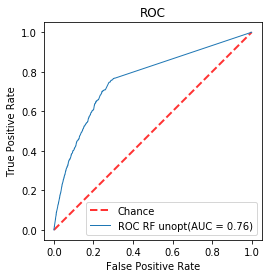

In [42]:
plot_roc(y_prob,y_test,'RF unopt',  first_plot=True)

# Optimization of the hyperparameters

In [30]:
param_dist = {
              "n_estimators": sp_randint(1, 40),
              "max_depth": sp_randint(1, 20),
              "max_features": sp_randint(1, 40),
              "min_samples_split": sp_randint(2, 20),
            }

# run randomized search
n_iter_search = 30
clf = RandomForestClassifier( bootstrap=20, criterion="entropy",class_weight="balanced")
random_search = RandomizedSearchCV(clf,scoring='roc_auc', param_distributions=param_dist,  cv=5, iid=False,  n_iter=n_iter_search)

random_search.fit(XT_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=20,
                                                    class_weight='balanced',
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jo

In [31]:
sorted(random_search.cv_results_.keys())
display(random_search.cv_results_['mean_test_score'])
clf=random_search.best_estimator_

array([0.85537972, 0.86234071, 0.8585667 , 0.85938427, 0.86171254,
       0.78192971, 0.86237218, 0.86286214, 0.83122649, 0.8208762 ,
       0.85496936, 0.8051249 , 0.84190334, 0.86373125, 0.86178698,
       0.84080376, 0.85636111, 0.86143703, 0.84175632, 0.85904669,
       0.85276493, 0.8404553 , 0.85592727, 0.85536611, 0.84303385,
       0.83331453, 0.84239381, 0.8403768 , 0.85967896, 0.85417696])

In [32]:
y_pred_o=clf.predict(XT_test)
y_prob_o=clf.predict_proba(XT_test)[:, 1]


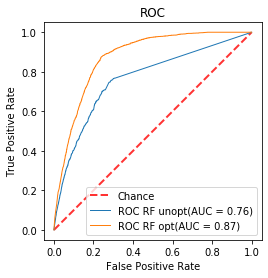

In [43]:
plot_roc(y_prob,y_test,'RF unopt',  first_plot=True)
plot_roc(y_prob_o,y_test,'RF opt',  first_plot=False)
plt.legend(loc=4)

In [36]:
display(confusion_matrix(y_test, clf.predict(XT_test)))

array([[16112,  5049],
       [  217,  1506]])

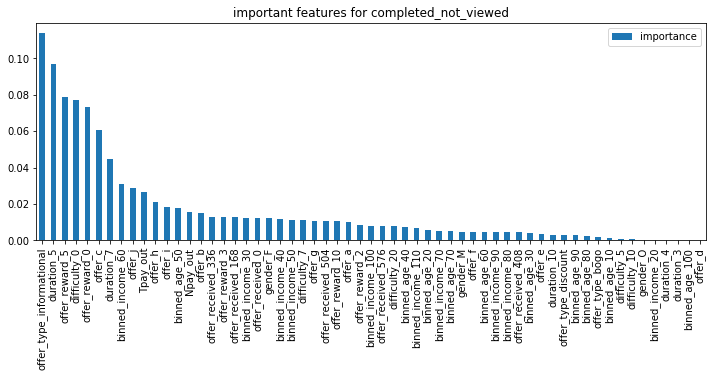

In [34]:
feat=pd.DataFrame.from_dict(dict(zip(XT_train.columns,clf.feature_importances_) ), orient='index',columns=['importance'])
feat=feat.sort_values(by=['importance'],ascending=False)

feat.plot(kind='bar',figsize=(12,4));
plt.title('important features for completed_not_viewed');


# Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

# specify parameters and distributions to sample from
param_dist = {
              "max_depth": sp_randint(2, 50),
              "max_features": sp_randint(1, 50),
              "min_samples_split": uniform(.1, .9),
    
            }

# run randomized search
n_iter_search = 20
clf = DecisionTreeClassifier(  criterion="entropy",class_weight="balanced")

random_search = RandomizedSearchCV(clf,scoring='roc_auc', param_distributions=param_dist,  cv=5, iid=False,  n_iter=n_iter_search)

random_search.fit(XT_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitte

In [38]:
sorted(random_search.cv_results_.keys())
display(random_search.cv_results_['mean_test_score'])
clf=random_search.best_estimator_

array([0.81074552, 0.76252969, 0.62760073, 0.81779675, 0.76862862,
       0.81868377, 0.78242403, 0.69119658, 0.73526256, 0.74064711,
       0.73463107, 0.68508799, 0.73258438, 0.68721002, 0.70059015,
       0.73401213, 0.70626632, 0.69466616, 0.83611927, 0.78017039])

In [39]:
y_pred_t=clf.predict(XT_test)
y_prob_t=clf.predict_proba(XT_test)[:, 1]


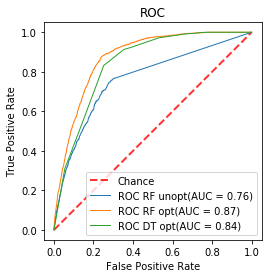

In [44]:
plot_roc(y_prob,y_test,'RF unopt',  first_plot=True)
plot_roc(y_prob_o,y_test,'RF opt',  first_plot=False)
plot_roc(y_prob_t,y_test,'DT opt',  first_plot=False)

In [46]:
display(confusion_matrix(y_test, clf.predict(XT_test)))

array([[15834,  5327],
       [  290,  1433]])

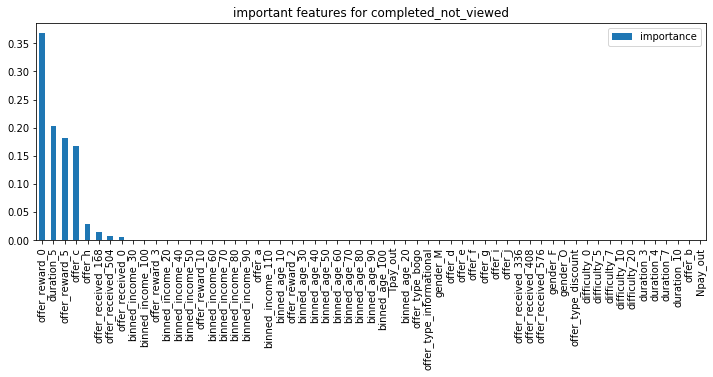

In [45]:
feat=pd.DataFrame.from_dict(dict(zip(XT_train.columns,clf.feature_importances_) ), orient='index',columns=['importance'])
feat=feat.sort_values(by=['importance'],ascending=False)

feat.plot(kind='bar',figsize=(12,4));
plt.title('important features for completed_not_viewed');

In [56]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None,   feature_names=XT_test.columns,
                                class_names=True,  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
graph.render(filename='graph',format='png');



# Recommendation System: LightFM

In [6]:
outd=out.copy()
# outd=outd.drop(columns=c_num_leak_offer+c_num_offers+c_num_person_ignore+[ 'offer_viewed', 'offer_completed', 'offer_end'])
# outd=outd.drop(columns=['viewed', 'rewarded', 'received', 'comp_not_viewed', 'completed','overlaps'])
# outd=outd.drop(columns=['person','email'])
# outd=outd.drop(columns=['age','income'])

Y=out['completed']

In [7]:
X_train, X_test, y_train, y_test = train_test_split( out, Y, test_size=0.3, random_state=0)

In [32]:
def calc_interactions_count(out,portfolio):
    # completed offers +1, viewed not completed -1
    n_persons=np.unique(out.person.values).shape[0]
    n_offers=np.unique(out.offer.values).shape[0]
    print("n_persons,n_offers: ", n_persons,n_offers)
    
    
    pos_interactions=(out.loc[out.viewed]).groupby(by=['person','offer'])['completed'].agg('sum') 
    neg_interactions=(out.loc[((out.viewed) & (out.completed==False) )]).groupby(by=['person','offer'])['completed'].agg('count') 

    zero_interactions=0*(pos_interactions+neg_interactions).fillna(0)

    pos_interactions=(zero_interactions+pos_interactions).fillna(0)
    neg_interactions=(zero_interactions+neg_interactions).fillna(0)
    tot_interactions=pos_interactions-neg_interactions
    tot_interactions=tot_interactions.unstack().fillna(0)
    
    user_features=out.loc[out.viewed].groupby(by='person')['age','gender_num','income','user_time', 'Tpay_out', 'Npay_out'].agg('mean')
    
    item_features=portfolio.sort_values(by='offer')

    item_features.loc[item_features.offer_type=='discount','offer_num']=0
    item_features.loc[item_features.offer_type=='bogo','offer_num']=1
    item_features.loc[item_features.offer_type=='informational','offer_num']=2
    item_features['web']=item_features['web'].astype(int)
    item_features['mobile']=item_features['mobile'].astype(int)
    item_features['social']=item_features['social'].astype(int)

    item_features=item_features.drop(columns=['offer','offer_type','email'])
    

    
    return(tot_interactions,user_features,item_features)


def df2_lightfm_sparse(interactions,user_features,item_features):
    # interactions,user_features,item_features --> sparse
    interactions=coo_matrix(interactions.values)
    user_features=csr_matrix(user_features.values)
    item_features=csr_matrix(item_features.values)
    
    return(interactions,user_features,item_features)

In [9]:
def calc_interactions_amount_paid(out,portfolio):
    # completed offers +1, viewed not completed -1
    n_persons=np.unique(out.person.values).shape[0]
    n_offers=np.unique(out.offer.values).shape[0]
    print("n_persons,n_offers: ", n_persons,n_offers)

    paid=(out.loc[((out.viewed) & (out.offer_type!='informational'))]).groupby(by=['person','offer'])['Tpay_offer','duration_effective','difficulty','duration_hours'].agg('sum') 
    paid['interaction']=(paid['Tpay_offer']/paid['difficulty'])/(paid['duration_effective']/paid['duration_hours'])
    # paid.head()
    # paid['interaction'].hist(bins=100)
    
    interactions=paid['interaction']
    
    user_features=out.loc[out.viewed].groupby(by='person')['age','gender_num','income','user_time', 'Tpay_out', 'Npay_out'].agg('mean')
    
    item_features=portfolio.loc[portfolio.offer_type!='informational'].sort_values(by='offer')

    item_features.loc[item_features.offer_type=='discount','offer_num']=0
    item_features.loc[item_features.offer_type=='bogo','offer_num']=1
#     item_features.loc[item_features.offer_type=='informational','offer_num']=2
    item_features['web']=item_features['web'].astype(int)
    item_features['mobile']=item_features['mobile'].astype(int)
    item_features['social']=item_features['social'].astype(int)

    item_features=item_features.drop(columns=['offer','offer_type','email'])
    
    return(interactions,user_features,item_features)

In [64]:
out['comp_not_viewed2']=out.completed & ~out.viewed
out['comp_not_viewed2']=out.offer_viewed > out.offer_completed


In [23]:
person='041967ceb80841ddbd306958d4f744ac'

out.loc[out.person==person].iloc[1]
# transactions_all.loc[transactions_all.person=='00bbce6533f44ddeaf4dd32bcab55441']

person                  041967ceb80841ddbd306958d4f744ac
offer                                                  a
offer_received                                       504
offer_viewed                                         534
offer_completed                                      576
reward                                                 5
offer_end                                            744
difficulty                                            20
duration                                              10
offer_type                                      discount
web                                                 True
email                                               True
mobile                                             False
social                                             False
offer_reward                                           5
duration_hours                                       240
duration_viewed                                      210
duration_effective             

In [24]:
transactions_during_offer.loc[transactions_during_offer.person==person]

,person,time,payments,tr_id,offer,idx,offer_viewed,overlaps,payments_original
12875,041967ceb80841ddbd306958d4f744ac,504,13.950,215853,a,2153,492.0,0,13.95
12876,041967ceb80841ddbd306958d4f744ac,576,13.400,259546,a,2154,492.0,1,26.80
122000,041967ceb80841ddbd306958d4f744ac,576,13.400,259546,f,2154,576.0,1,26.80
12877,041967ceb80841ddbd306958d4f744ac,606,11.610,275518,a,2155,492.0,1,23.22
122001,041967ceb80841ddbd306958d4f744ac,606,11.610,275518,f,2155,576.0,1,23.22
12878,041967ceb80841ddbd306958d4f744ac,642,12.545,288527,a,2156,492.0,1,25.09
122002,041967ceb80841ddbd306958d4f744ac,642,12.545,288527,f,2156,576.0,1,25.09
64126,041967ceb80841ddbd306958d4f744ac,108,35.470,43652,i,2151,6.0,0,35.47


In [28]:
transactions_during_offer.loc[transactions_during_offer.idx.duplicated()]

,person,time,payments,tr_id,offer,idx,offer_viewed,overlaps,payments_original
79594,dbbbbe43571d458e93a09a0a5558d7ee,168,4.865,66238,b,119270,168.0,1,9.73
95691,fc505c0e65564765a6c65396619b444f,168,3.055,66696,d,137072,168.0,1,6.11
65980,2a1f35a3e38b4b5a83aef753f2653263,168,7.210,66799,i,22334,168.0,1,14.42
117487,e18a016634be4e16a9ab52c094fd9daf,168,4.925,67000,f,122475,168.0,1,9.85
66568,301fd1800ffd4897aed469da5705e223,168,6.545,67774,i,26099,168.0,1,13.09
66828,d910c3264654421a9a72916bd1816611,168,0.495,68240,i,117731,168.0,1,0.99
104020,f0b38ab2fd2b4a88a4a56c8236ed02d2,168,6.805,68352,h,130887,168.0,1,13.61
81518,ba95c8b450ba4740bd815048c5045307,168,4.990,68474,b,101827,168.0,1,9.98
8575,fbc039723b044dfd8a1723a976d667d9,174,5.250,69374,a,136838,18.0,1,10.50
8576,fbc039723b044dfd8a1723a976d667d9,192,5.510,77247,a,136839,18.0,1,11.02


In [25]:
transactions_all.loc[transactions_all.person==person]

,tr_id,person,time,payments
idx,,,,
2151,43652,041967ceb80841ddbd306958d4f744ac,108,35.47
2152,101895,041967ceb80841ddbd306958d4f744ac,282,14.88
2153,215853,041967ceb80841ddbd306958d4f744ac,504,13.95
2154,259546,041967ceb80841ddbd306958d4f744ac,576,26.80
2155,275518,041967ceb80841ddbd306958d4f744ac,606,23.22
2156,288527,041967ceb80841ddbd306958d4f744ac,642,25.09


In [26]:
out.loc[out.person==person]

,person,offer,offer_received,offer_viewed,offer_completed,reward,offer_end,difficulty,duration,offer_type,...,tot_gross_offer_time,tot_net_offers_time,tot_not_offers_time,Avg_pay_offers,Net_pay_offers,Avg_net_pay_offers,Avg_pay_outside,Avg_D_O,Avg_D_OS,Avg_D_nOS
12016,041967ceb80841ddbd306958d4f744ac,a,408,492.0,576.0,5.0,648.0,20,10,discount,...,552.0,368.0,376.0,0.338397,109.53,0.297636,0.0,0.330160,0.338397,0.297636
13271,041967ceb80841ddbd306958d4f744ac,a,504,534.0,576.0,5.0,744.0,20,10,discount,...,552.0,368.0,376.0,0.338397,109.53,0.297636,0.0,0.000000,0.338397,0.297636
38630,041967ceb80841ddbd306958d4f744ac,i,0,6.0,108.0,5.0,120.0,5,5,bogo,...,552.0,368.0,376.0,0.338397,109.53,0.297636,0.0,0.311140,0.338397,0.297636
75472,041967ceb80841ddbd306958d4f744ac,f,576,576.0,NaN,0.0,648.0,0,3,informational,...,552.0,368.0,376.0,0.338397,109.53,0.297636,0.0,0.521597,0.338397,0.297636


In [18]:
paid=(out.loc[((out.viewed) & (out.offer_type!='informational') & (~out.comp_not_viewed) )]).groupby(by=['person','offer','offer_received'])['Tpay_offer','duration_effective','difficulty','duration_hours','completed','viewed'].agg('sum') 
paid['pay_delta']=paid['Tpay_offer']-paid['difficulty']
paid['pay_ratio']=paid['Tpay_offer']/paid['difficulty']

# paid['interaction']=(paid['Tpay_offer']/paid['difficulty'])#/(paid['duration_effective']/paid['duration_hours'])
paid['c_on_v']=paid['completed'].astype(int)/paid['viewed'].astype(int)

In [20]:
paid.loc[(paid.pay_delta<-10) & paid.completed]#.head()

,,,Tpay_offer,duration_effective,difficulty,duration_hours,completed,viewed,pay_delta,pay_ratio,c_on_v
person,offer,offer_received,,,,,,,,,
041967ceb80841ddbd306958d4f744ac,a,504,0.000000,210.0,20,240.0,True,True,-20.000000,0.000000,1.0
122c0c2a3c2540848f8c3fdc37e97639,a,576,0.000000,216.0,20,240.0,True,True,-20.000000,0.000000,1.0
15d02d3266d14a3ea21b016fc045726d,a,504,0.000000,192.0,20,240.0,True,True,-20.000000,0.000000,1.0
16943b16c68041a79b0edd556c808fab,a,408,9.745000,180.0,20,240.0,True,True,-10.255000,0.487250,1.0
17c0490a3b724ae6b5c109a20e890fce,a,408,5.665000,216.0,20,240.0,True,True,-14.335000,0.283250,1.0
1a6441a8ccd74a81a388841d357b8c0d,a,576,0.000000,240.0,20,240.0,True,True,-20.000000,0.000000,1.0
1d4accd4959644ffbf54d95ce72ce03b,a,576,0.000000,216.0,20,240.0,True,True,-20.000000,0.000000,1.0
295b2fae25c2477bba8d22d6e41ede2d,a,408,4.370000,174.0,20,240.0,True,True,-15.630000,0.218500,1.0
2f99a66263ba4f9ca0451bd2aee07c63,a,504,9.935000,234.0,20,240.0,True,True,-10.065000,0.496750,1.0


In [48]:
paid.loc[(paid.pay_delta<-1) & (paid)].head(20)

AttributeError: 'DataFrame' object has no attribute 'c_on_v'

In [12]:
pr=paid.reset_index()

In [13]:
sns.scatterplot(data=pr.loc[pr.offer=='a'],x='pay_delta',y='c_on_v')
# plt.axis([0,50,-.1,1.1]);

ValueError: Could not interpret input 'c_on_v'

In [79]:
print('train dataset:')

train,user_train,item_features=calc_interactions_count(X_train,portfolio)
print()

print('test dataset:')
test,user_test,item_features=calc_interactions_count(X_test,portfolio)



train dataset:
n_persons,n_offers:  16791 10

test dataset:
n_persons,n_offers:  13284 10


In [81]:

model = LightFM(no_components=8)
model.fit(train,
          user_features=user_train,
          item_features=item_features,
          epochs=50)

In [5]:
X,user_train,item_features=calc_interactions(out,portfolio)

n_persons,n_offers:  16994 10


In [7]:
X.stack().reset_index().head()

,person,offer,0
0,0009655768c64bdeb2e877511632db8f,a,0.0
1,0009655768c64bdeb2e877511632db8f,b,0.0
2,0009655768c64bdeb2e877511632db8f,c,0.0
3,0009655768c64bdeb2e877511632db8f,d,-1.0
4,0009655768c64bdeb2e877511632db8f,e,0.0


In [15]:
user_train.head()

,age,gender_num,income,user_time,Tpay_out,Npay_out
person,,,,,,
0009655768c64bdeb2e877511632db8f,33,1,72000.0,461,0.0,0.0
00116118485d4dfda04fdbaba9a87b5c,118,-1,NaN,92,0.0,0.0
0011e0d4e6b944f998e987f904e8c1e5,40,2,57000.0,198,0.0,0.0
0020c2b971eb4e9188eac86d93036a77,59,0,90000.0,874,0.0,0.0
0020ccbbb6d84e358d3414a3ff76cffd,24,0,60000.0,622,0.0,0.0


In [10]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

from surprise.reader import Reader
from surprise.model_selection import cross_validate

In [11]:
X,user_train,item_features=calc_interactions_amount_paid(out,portfolio)

n_persons,n_offers:  16994 10


In [12]:
# X.describe()
X.loc[X>5]=5
X.describe()

count    39559.000000
mean         2.306951
std          1.987627
min          0.000000
25%          0.335819
50%          1.828571
75%          4.961833
max          5.000000
Name: interaction, dtype: float64

In [13]:
# reader = Reader(rating_scale=(-4,4))
# data = Dataset.load_from_df(X.stack().reset_index(),reader)

reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(X.reset_index(),reader)

In [14]:
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 1.7139


1.7139058903453253

In [34]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.7027  1.7131  1.7077  1.6985  1.7084  1.7061  0.0050  
MAE (testset)     1.4495  1.4560  1.4537  1.4471  1.4516  1.4516  0.0031  
Fit time          3.67    2.84    2.58    2.67    2.50    2.85    0.43    
Test time         0.09    0.06    0.06    0.18    0.07    0.09    0.05    


{'test_rmse': array([1.70273297, 1.7131473 , 1.70774698, 1.6985246 , 1.70838   ]),
 'test_mae': array([1.4495264 , 1.45601171, 1.45366635, 1.44714448, 1.45156981]),
 'fit_time': (3.673551082611084,
  2.844141721725464,
  2.5813333988189697,
  2.666994571685791,
  2.5012707710266113),
 'test_time': (0.09360098838806152,
  0.06240057945251465,
  0.06240057945251465,
  0.18201804161071777,
  0.07380342483520508)}

In [17]:
predictions = algo.test(testset)

In [19]:
X.head()

person                            offer
0009655768c64bdeb2e877511632db8f  i        4.703333
                                  j        5.000000
00116118485d4dfda04fdbaba9a87b5c  i        0.000000
0011e0d4e6b944f998e987f904e8c1e5  a        1.252222
                                  b        1.908800
Name: interaction, dtype: float64

In [32]:
from surprise.similarities import cosine, msd

In [34]:
# from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters= 5,  assign_labels="discretize").fit(X.values)

MemoryError: 

https://github.com/facebookresearch/faiss/wiki/Getting-started

In [40]:
from sklearn.cluster import DBSCAN

In [ ]:
clustering = DBSCAN(eps=3, min_samples=2).fit(X.values)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=n_clusters,linkage="average", affinity="cosine")
model.fit(X)

In [8]:
from sklearn.manifold import TSNE

In [ ]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [ ]:
plt.plot(X_embedded[:,0],X_embedded[:,1],'o',alpha=0.2)

# Clustering

In [43]:
out['completed']=out['completed'].astype(int)
out['viewed']=out['viewed'].astype(int)

paid=(out.loc[((out.viewed) & (out.offer_type!='informational') & (~out.comp_not_viewed) )]).groupby(by=['person','offer','offer_received'])['Tpay_offer','duration_effective','difficulty','duration_hours','completed','viewed'].agg('sum') 
paid['pay_delta']=paid['Tpay_offer']-paid['difficulty']
paid['pay_ratio']=paid['Tpay_offer']/paid['difficulty']

# paid['interaction']=(paid['Tpay_offer']/paid['difficulty'])#/(paid['duration_effective']/paid['duration_hours'])
paid['c_on_v']=paid['completed'].astype(int)/paid['viewed'].astype(int)
paid=paid.reset_index()

In [68]:
paid2=paid.loc[paid.offer=='b'].groupby(by='person')['Tpay_offer','duration_effective','difficulty',
                                                     'duration_hours','completed','viewed'].agg('sum')
paid2['c_on_v']=paid2['completed']/paid2['viewed']
paid2=paid2.reset_index()

In [92]:
pc=paid2.merge(profile_all[['person','age','income','gender_num','user_time']],on='person',how='inner')
pc.income=pc.income.fillna(65400)
pc.age=pc.age.fillna(54)
pc.gender_num=pc.gender_num.fillna(1)
pc['dp']=pc.duration_effective/pc.duration_hours
pc=pc.drop(columns=['person','duration_effective','difficulty',
                    'duration_hours'])

In [93]:
pc.head()

,Tpay_offer,completed,viewed,c_on_v,age,income,gender_num,user_time,dp
0,11.93,1,1,1.0,40,57000.0,2,198,0.892857
1,46.59,1,1,1.0,24,60000.0,0,622,1.000000
2,2.39,0,1,0.0,118,65400.0,-1,41,0.964286
3,0.48,0,1,0.0,118,65400.0,-1,85,1.000000
4,2.58,0,2,0.0,118,65400.0,-1,29,0.982143


In [99]:
from sklearn.manifold import TSNE
X=pc.values

In [95]:
XE = TSNE(n_components=2).fit_transform(pc.values)

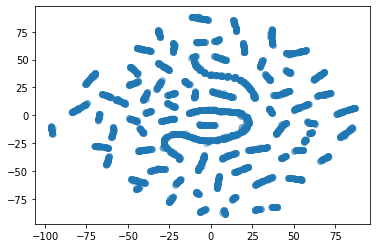

In [96]:
plt.plot(XE[:,0],XE[:,1],'o',alpha=0.2)

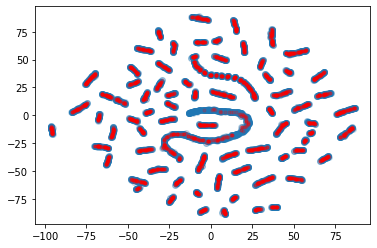

In [102]:
plt.plot(XE[:,0],XE[:,1],'o',alpha=0.2)
plt.plot(XE[X[:,3]>.9,0],XE[X[:,3]>.9,1],'r.',alpha=0.2)

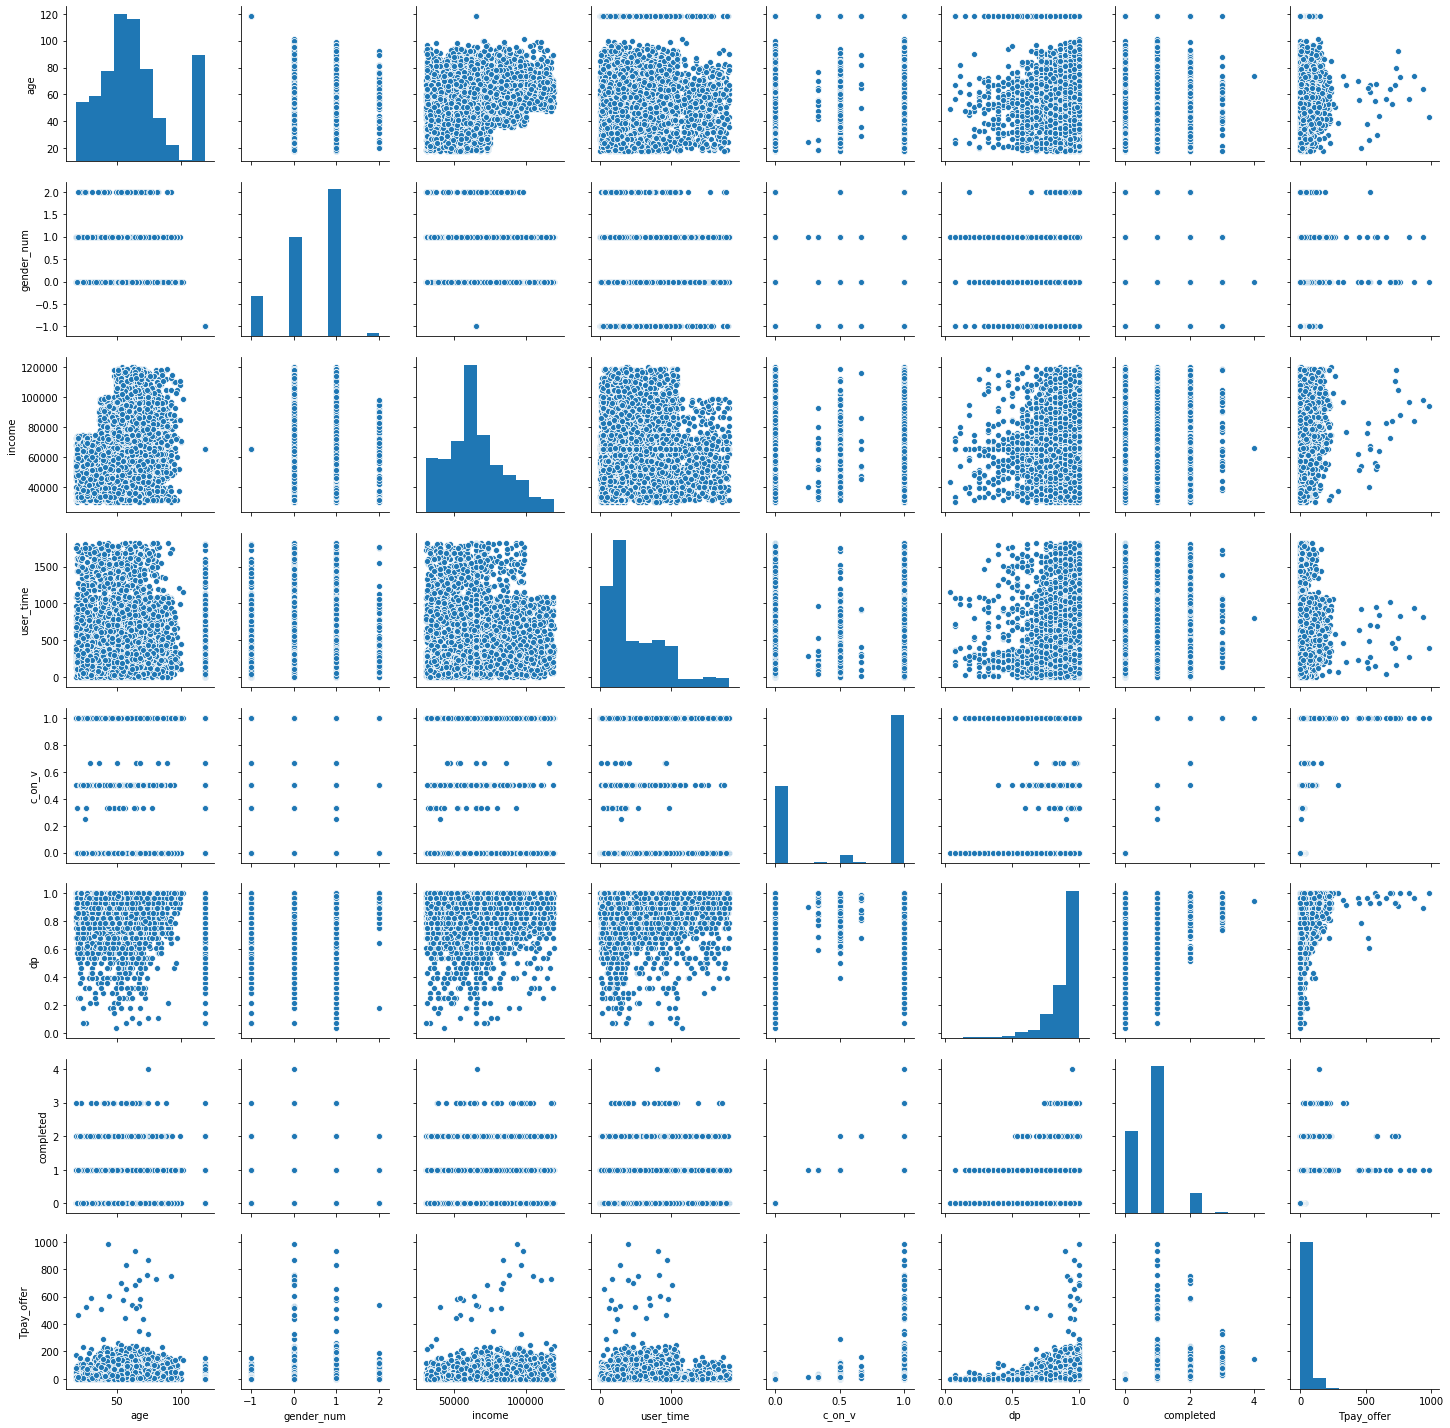

In [104]:
sns.pairplot(pc,vars=['age','gender_num','income','user_time','c_on_v','dp','completed','Tpay_offer']);